In [2]:
import pandas as pd
import numpy as np
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests

import craigslist
from craigslist import CraigslistPersonals

In [3]:
df = pd.read_csv("../../Craigslist_Project/Data/Craigs_1_26")


In [4]:
df.head(2)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL
0,5.915963e+09,Turning love to hate,austin,"(30.3423, -97.6673)","In the wind, along with my love",m4w,NaN,NaN,NaN,Imagine the effort it takes to cultivate love ...,2016-12-12 08:23,False,True,http://austin.craigslist.org/mis/5915962984.html
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,m4m,28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html


## Exploring Age

In [5]:
df_cleaning = df[df["Who_to"].notnull() & df["Age"].notnull()]

In [6]:
df_cleaning.Age.unique()

array([  28.,   58.,   36.,   65.,   40.,   34.,   52.,   29.,   22.,
         54.,   30.,   33.,  100.,   27.,   26.,   47.,   42.,   48.,
         49.,   24.,   68.,   23.,   21.,   35.,   46.,   74.,   59.,
         25.,   56.,   53.,   45.,   44.,   38.,   39.,   50.,   32.,
        101.,   31.,   75.,   43.,  123.,   37.,   41.,   64.,   99.,
         51.,   55.,   20.,   60.,   62.,   18.,   57.,   92.,   19.,
         72.,   67.,   69.,   63.,   80.,   93.,   79.])

In [7]:
df_cleaning.shape

(1917, 14)

In [8]:
df_cleaning.Who_to.unique()

array(['m4m', 'm4w', 'w4m', 'w4w', 'mw4mw', 'ww4m', 't4m', 'm4t', 'm4ww',
       'm4mw', 't4mm', 'm4mm', 'mw4m', 'w4mm', 'mw4w', 't4ww', 'ww4w',
       'w4ww', 'w4mw', 't4w'], dtype=object)

In [9]:
df_cleaning.shape

(1917, 14)

In [10]:
df_cleaning.Who_to = df_cleaning.Who_to.map(lambda x: x.split('4'))

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
df_cleaning["From"] = 1
df_cleaning["To"] = 1

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
df_cleaning.head(4)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL,From,To
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,"[m, m]",28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html,1,1
2,5.965702e+09,Heb this evening,austin,"(30.299463, -97.720041)",Hancock,"[m, m]",58.0,NaN,fit,Long shot here but for some reason I can't let...,2017-01-19 00:21,False,True,http://austin.craigslist.org/mis/5965702493.html,1,1
3,5.965675e+09,Baby Mamas Beware!!!,austin,NaN,NaN,"[m, w]",36.0,NaN,NaN,I am not a man seeking a woman I am a woman he...,2017-01-18 23:26,False,True,http://austin.craigslist.org/mis/5965674600.html,1,1
4,5.965667e+09,I'm free!,austin,NaN,NaN,"[w, m]",65.0,NaN,NaN,I'm finally free!! I'm not scared of you anymo...,2017-01-18 23:14,False,True,http://austin.craigslist.org/mis/5965667199.html,1,1


In [13]:
df_cleaning["From"] = df_cleaning.Who_to.map(lambda x: x[0])
df_cleaning["To"] = df_cleaning.Who_to.map(lambda x: x[1])

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
def checking_category(inp):
    if inp == "mm":
        return 'couple'
    elif inp == "ww":
        return 'couple'
    elif inp == "mw": 
        return 'couple'
    elif inp == "wm":
        return 'couple'
    else:
        return inp

df_cleaning["From"] = df_cleaning.From.map(checking_category)
df_cleaning["To"] = df_cleaning.To.map(checking_category)

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
df_cleaning.From.unique()
df_cleaning.To.unique()

array(['m', 'w', 'couple', 't'], dtype=object)

In [16]:
df_cleaning.head(3)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL,From,To
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,"[m, m]",28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html,m,m
2,5.965702e+09,Heb this evening,austin,"(30.299463, -97.720041)",Hancock,"[m, m]",58.0,NaN,fit,Long shot here but for some reason I can't let...,2017-01-19 00:21,False,True,http://austin.craigslist.org/mis/5965702493.html,m,m
3,5.965675e+09,Baby Mamas Beware!!!,austin,NaN,NaN,"[m, w]",36.0,NaN,NaN,I am not a man seeking a woman I am a woman he...,2017-01-18 23:26,False,True,http://austin.craigslist.org/mis/5965674600.html,m,w


In [17]:
df_graph = df_cleaning.groupby(["Age"])['From'].count()

In [18]:
df_graph.unique()

array([ 13,   7,  22,  25,  61,  45,  91,  74,  75,  70,  93, 121,  54,
        69,  52,  59,  87,  73,  47,  67,  27,  77,  42,  32,  34,  57,
        37,  28,  51,  10,  19,  20,  30,   8,  15,   9,  17,   3,   1,
         5,   2,  14,   4])

In [19]:
df_attempt = df_cleaning.groupby(["Age", "From"])['Ids'].count()

In [20]:
df_attempt = pd.DataFrame(df_attempt)

In [21]:
df = df_attempt.reset_index()

In [22]:
df.head(3)

,Age,From,Ids
0,18.0,m,10
1,18.0,t,1
2,18.0,w,2


In [23]:
def custom_aggregation_function(x):
    try:
        return x.iloc[3]
    except:
        return 0


df_pivot = pd.pivot_table(df, values='Ids', columns= 'From', index = 'Age', fill_value= 0).reset_index()

In [24]:
df_pivot.head()

From,Age,couple,m,t,w
0,18.0,0,10,1,2
1,19.0,0,6,0,1
2,20.0,0,9,0,4
3,21.0,0,18,0,4
4,22.0,0,21,0,4


In [25]:
df = df_from_json(data)

NameError: name 'df_from_json' is not defined

In [26]:
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.charts.utils import df_from_json
from bokeh.sampledata.olympics2014 import data

# utilize utility to make it easy to get json/dict data converted to a dataframe
# df = df_from_json(data)

# # filter by countries with at least one medal and sort by total medals
# df = df[df['total'] > 0]
# df = df.sort("total", ascending=False)

bar = Bar(df_pivot,
          values=blend('couple','m','w', name='medals', labels_name='medal'),
          label=cat(columns='Age', sort=False),
          stack=cat(columns='medal', sort=False),
          color=color(columns='medal', palette=['Green', 'Blue', 'Pink'],
                      sort=False),
          legend='top_right',
          title="Medals per Country, Sorted by Total Medals",
          tooltips=[('medal', '@medal'), ('country', '@abbr')])

output_file("stacked_bar.html", title="stacked_bar.py example")

show(bar)

### Exploring Date_time

In [27]:
df = df_cleaning

In [28]:
df.Datetime.dtype

dtype('O')

In [29]:
df_date = pd.to_datetime(pd.Series(df.Datetime))

In [30]:
df_date = pd.DataFrame(df_date)

In [31]:
# df_date["only_date"] = [d.date() for d in df_date['Datetime']]
df["only_time_hour"] = [d.hour for d in df_date['Datetime']]

In [32]:
df.head(5)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL,From,To,only_time_hour
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,"[m, m]",28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html,m,m,0
2,5.965702e+09,Heb this evening,austin,"(30.299463, -97.720041)",Hancock,"[m, m]",58.0,NaN,fit,Long shot here but for some reason I can't let...,2017-01-19 00:21,False,True,http://austin.craigslist.org/mis/5965702493.html,m,m,0
3,5.965675e+09,Baby Mamas Beware!!!,austin,NaN,NaN,"[m, w]",36.0,NaN,NaN,I am not a man seeking a woman I am a woman he...,2017-01-18 23:26,False,True,http://austin.craigslist.org/mis/5965674600.html,m,w,23
4,5.965667e+09,I'm free!,austin,NaN,NaN,"[w, m]",65.0,NaN,NaN,I'm finally free!! I'm not scared of you anymo...,2017-01-18 23:14,False,True,http://austin.craigslist.org/mis/5965667199.html,w,m,23
5,5.965516e+09,Hot girl on the 201 bus about 7:45pm,austin,"(30.161204, -97.801557)",South first,"[m, w]",40.0,NaN,NaN,You kept looking at me from the back right sid...,2017-01-18 20:06,False,True,http://austin.craigslist.org/mis/5965515862.html,m,w,20


In [33]:
z = df.groupby(['only_time_hour','From'])['Ids'].count()

In [34]:
df_grouped = pd.DataFrame(z).reset_index()

In [35]:
df_grouped

,only_time_hour,From,Ids
0,0,m,39
1,0,t,2
2,0,w,20
3,1,m,35
4,1,t,1
5,1,w,14
6,2,m,21
7,2,w,8
8,3,m,17
9,3,t,1


In [36]:
df_grouped.head(2)

,only_time_hour,From,Ids
0,0,m,39
1,0,t,2


In [37]:
def custom_aggregation_function(x):
    try:
        return x.iloc[3]
    except:
        return 0


df_pivot = pd.pivot_table(df_grouped, values='Ids', columns= 'From', index = 'only_time_hour', fill_value= 0).reset_index()

In [38]:
df_pivot.head()

From,only_time_hour,couple,m,t,w
0,0,0,39,2,20
1,1,0,35,1,14
2,2,0,21,0,8
3,3,0,17,1,5
4,4,0,19,1,6


In [740]:
import seaborn as sns

In [741]:
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.charts.utils import df_from_json
from bokeh.sampledata.olympics2014 import data

# utilize utility to make it easy to get json/dict data converted to a dataframe
# df = df_from_json(data)

# # filter by countries with at least one medal and sort by total medals
# df = df[df['total'] > 0]
# df = df.sort("total", ascending=False)

bar = Bar(df_pivot,
          values=blend('couple','m','w', name='medals', labels_name='medal'),
          label=cat(columns='only_time_hour', sort=False),
          stack=cat(columns='medal', sort=False),
          color=color(columns='medal', palette=['Green', 'Blue', 'Pink'],
                      sort=False),
          legend='top_right',
          title="Medals per Country, Sorted by Total Medals",
          tooltips=[('medal', '@medal'), ('country', '@abbr')])

output_file("stacked_bar.html", title="stacked_bar.py example")

show(bar)

INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


In [ ]:
data.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = df_pivot

x = df_pivot.only_time_hour

A = df_pivot.m
B = df_pivot.w
C = df_pivot.couple

plt.bar(x, A, color = 'b', width = 0.25)
plt.bar(x, B, color = 'g', width = 0.25)
plt.bar(x, C, color = 'r', width = 0.25)

plt.show()


### Gay or Straight:

In [628]:
df = pd.read_csv("../../Craigslist_Project/Data/Craigs_1_26")
df_cleaning = df[df["Who_to"].notnull()]

In [635]:
df_cleaning.Who_to = df_cleaning.Who_to.map(lambda x: x.split('4'))

In [636]:
df_cleaning.head(2)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL,Gay
0,5.915963e+09,Turning love to hate,austin,"(30.3423, -97.6673)","In the wind, along with my love","[m, w]",NaN,NaN,NaN,Imagine the effort it takes to cultivate love ...,2016-12-12 08:23,False,True,http://austin.craigslist.org/mis/5915962984.html,0
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,"[m, m]",28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html,0


In [672]:
count = []
attraction = []
for i in df_cleaning.Who_to:
    if i[0] == 'm' and i[1] == 'm':
        count.append(1)
        attraction.append('Gay')    
    else: 
        count.append(0)
        attraction.append('Straight')


In [674]:
df_cleaning['Gay'] = count
df_cleaning['attraction'] = attraction

In [675]:
df_cleaning.Gay.sum()

1469

In [676]:
df_cleaning.shape

(5180, 17)

In [677]:
df_cleaning.head(2)

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL,Gay,only_time_hour,attraction
0,5.915963e+09,Turning love to hate,austin,"(30.3423, -97.6673)","In the wind, along with my love","[m, w]",NaN,NaN,NaN,Imagine the effort it takes to cultivate love ...,2016-12-12 08:23,False,True,http://austin.craigslist.org/mis/5915962984.html,0,8,Straight
1,5.961141e+09,Pokémon Hunter in Van,austin,NaN,Downtown Round Rock,"[m, m]",28.0,NaN,athletic,I was Pokémon Hunting downtown today it was ab...,2017-01-19 00:45,True,True,http://austin.craigslist.org/mis/5961140651.html,1,0,Gay


In [667]:
df_date = pd.to_datetime(pd.Series(df.Datetime))

In [670]:
df_date = pd.DataFrame(df_date)

In [671]:
df["only_time_hour"] = [d.hour for d in df_date['Datetime']]

In [684]:
df_gay = df_cleaning.groupby(['only_time_hour','attraction'])['Ids'].count()

In [747]:
df_gay = pd.DataFrame(df_gay).reset_index()

In [748]:
df_gay.head(2)

,only_time_hour,attraction,Ids
0,0,Gay,43
1,0,Straight,140


In [749]:
df_gay = pd.pivot_table(df_gay, values='Ids', columns= 'attraction', index = 'only_time_hour').reset_index()

In [765]:
df_gay.plot.bar()

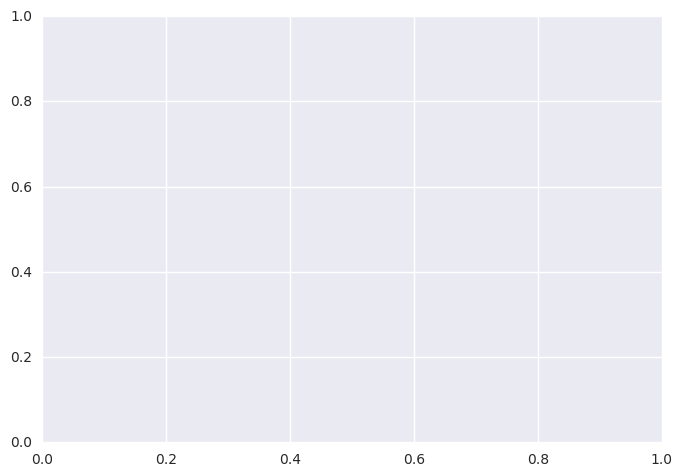

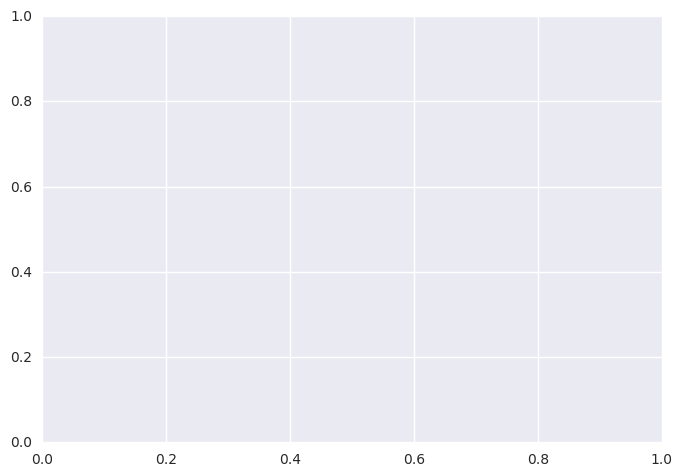

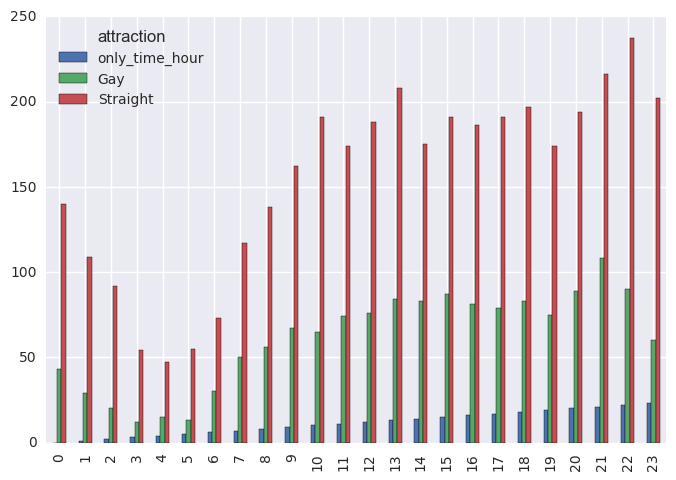

In [766]:
plt.show()